In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ < '1.3.0'): #update for latest scikit-learn version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.3.2


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
childcare = pd.read_csv("childcare_costs.csv")
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [5]:
counties = pd.read_csv("counties.csv")
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [6]:
counties['county_name'] = counties['county_name'].str.lower()
counties.head()

,county_fips_code,county_name,state_name,state_abbreviation
0,1001,autauga county,Alabama,AL
1,1003,baldwin county,Alabama,AL
2,1005,barbour county,Alabama,AL
3,1007,bibb county,Alabama,AL
4,1009,blount county,Alabama,AL


In [7]:
childcare = childcare.merge(counties, how = 'left', on = "county_fips_code")
childcare.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,81.40,104.95,104.95,85.92,83.45,83.45,81.40,autauga county,Alabama,AL
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,85.68,105.11,105.11,87.59,87.39,87.39,85.68,autauga county,Alabama,AL
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,89.96,105.28,105.28,89.26,91.33,91.33,89.96,autauga county,Alabama,AL
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,94.25,105.45,105.45,90.93,95.28,95.28,94.25,autauga county,Alabama,AL
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,98.53,105.61,105.61,92.60,99.22,99.22,98.53,autauga county,Alabama,AL


In [8]:
nc_childcare = childcare[childcare['state_name'] == "North Carolina"]
nc_childcare

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation
20789,37001,2008,5.71,5.32,6.07,5.2,4.9,5.5,77.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20790,37001,2009,6.60,6.12,7.05,6.1,5.7,6.5,75.8,74.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20791,37001,2010,8.35,7.42,9.24,7.9,6.9,8.9,75.7,76.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20792,37001,2011,8.64,7.55,9.68,8.1,6.9,9.2,75.1,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
20793,37001,2012,9.38,8.41,10.33,8.7,7.7,9.6,74.5,76.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alamance county,North Carolina,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21884,37199,2014,10.90,10.74,11.08,11.1,11.5,10.8,61.5,64.0,...,67.02,134.06,118.81,126.54,87.30,95.67,87.37,yancey county,North Carolina,NC
21885,37199,2015,11.01,10.86,11.13,11.6,12.1,11.2,61.7,64.2,...,80.26,140.64,130.18,123.11,103.97,96.75,92.78,yancey county,North Carolina,NC
21886,37199,2016,9.46,10.13,8.88,9.5,10.9,8.4,60.9,73.8,...,93.50,153.07,141.56,119.69,120.64,97.83,98.18,yancey county,North Carolina,NC
21887,37199,2017,8.34,9.68,7.18,8.8,10.7,7.1,62.9,89.6,...,106.75,165.50,152.93,116.27,137.32,98.91,103.59,yancey county,North Carolina,NC


In [9]:
# Count the number of rows with at least one NaN
count_rows_with_nan = nc_childcare.isnull().any(axis=1).sum()
print("Number of rows with at least one NaN:", count_rows_with_nan)

Number of rows with at least one NaN: 608


## Part 1: Trends in childcare costs

### Scatterplot of median household income vs average price of center-based childcare

Text(0, 0.5, 'Average Price Charge for Center-Based Childcare')

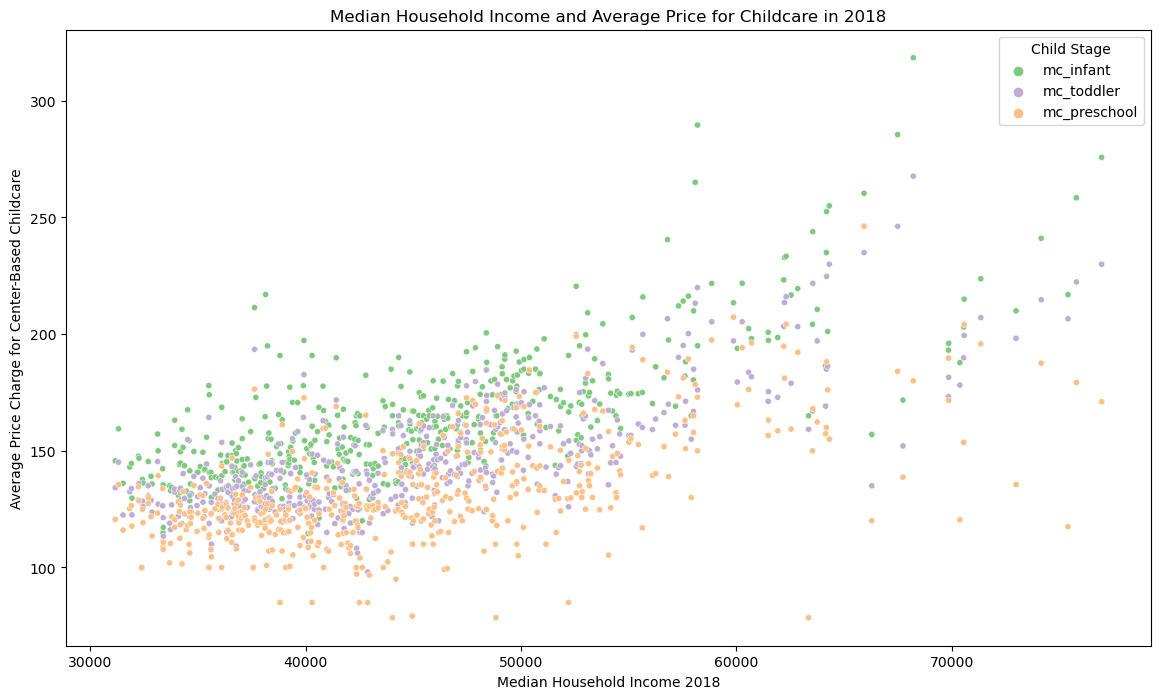

In [10]:
import seaborn as sns

nc_year_grouped = nc_childcare.groupby('mhi_2018')[['mc_infant', 'mc_toddler', 'mc_preschool']].mean()
nc_year_grouped = nc_year_grouped.reset_index()
melted_data = pd.melt(nc_year_grouped, id_vars=['mhi_2018'], value_vars=['mc_infant', 'mc_toddler', 'mc_preschool'], var_name='Child Stage', value_name='Mean of Median Price Charge for Center-Based Childcare')
plt.figure(figsize=(14, 8))
sns.scatterplot(x='mhi_2018', y="Mean of Median Price Charge for Center-Based Childcare", hue="Child Stage",palette='Accent',data=melted_data,s=20)
plt.title('Median Household Income and Average Price for Childcare in 2018')
plt.xlabel('Median Household Income 2018')
plt.ylabel('Average Price Charge for Center-Based Childcare')

Based on the scatterplot of the relationship between child care cost and average income in the year 2018 in North Carolina, we are able to make two general observations.

1) There is a positive relationship between the median household income and average price charge for family childcare cost in 2018.

2) Between the different child stages, families spend the most on childcare when the child was an infant (0-23 months), then when the child was a toddler(24-35 months), and lastly they spent the least when the child was in preschool(36-54 months).

### Average cost for center-based childcare from 2014-2018

In [11]:
selected_columns = ['study_year','mcsa', 'mfccsa', 'mc_infant', 'mc_toddler', 'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool']
rq1 = nc_childcare[selected_columns]
rq1 = rq1.dropna(how = 'any')
rq1

,study_year,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
20795,2014,112.53,80.55,159.43,144.97,145.85,112.64,104.69,96.80
20796,2015,108.50,94.16,160.65,148.71,140.63,121.98,113.51,108.85
20797,2016,104.48,107.77,162.10,152.45,135.42,131.32,122.34,120.90
20798,2017,100.46,121.38,163.54,156.19,130.21,140.65,131.16,132.94
20799,2018,96.43,134.99,164.99,159.92,124.99,149.99,139.99,144.99
...,...,...,...,...,...,...,...,...,...
21884,2014,97.63,67.02,134.06,118.81,126.54,87.30,95.67,87.37
21885,2015,94.99,80.26,140.64,130.18,123.11,103.97,96.75,92.78
21886,2016,92.35,93.50,153.07,141.56,119.69,120.64,97.83,98.18
21887,2017,89.71,106.75,165.50,152.93,116.27,137.32,98.91,103.59


In [12]:
# In NC, aggregated median price charge for Family Childcare in the year 2014-2018
rq1_family = rq1.groupby('study_year')[['mfcc_infant', 'mfcc_toddler', 'mfcc_preschool', 'mfccsa']].mean()
rq1_family = rq1_family.reset_index()
rq1_family

,study_year,mfcc_infant,mfcc_toddler,mfcc_preschool,mfccsa
0,2014,115.806122,107.865714,103.166633,86.623367
1,2015,119.886200,111.565500,106.980800,92.547500
2,2016,125.515918,116.259694,112.027347,99.713061
3,2017,131.277449,120.585408,116.720612,106.574184
4,2018,137.118571,124.910612,121.414082,113.433980


In [13]:
rq1_family['study_year'] = rq1_family['study_year'].astype(str)

In [14]:
# In NC, aggregated median price charge for Center-Based Childcare in the year 2014-2018
rq1_center = rq1.groupby('study_year')[['mc_infant', 'mc_toddler', 'mc_preschool', 'mcsa']].mean()
rq1_center = rq1_center.reset_index()
rq1_center

,study_year,mc_infant,mc_toddler,mc_preschool,mcsa
0,2014,162.734184,150.102653,147.063571,113.464388
1,2015,159.594800,147.730300,139.708600,107.789100
2,2016,162.246020,146.250714,133.198776,102.766633
3,2017,164.414184,144.325000,126.266429,97.418265
4,2018,166.582755,142.398469,119.332551,92.069694


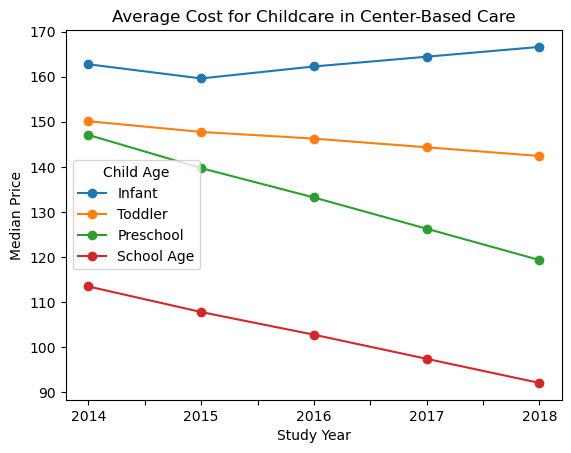

In [15]:
rq1_center['study_year'] = rq1_center['study_year'].astype(str)

# Plotting the data
ax = rq1_center.set_index('study_year').plot(kind='line', marker='o')

# Adding labels and title
plt.title('Average Cost for Childcare in Center-Based Care')
plt.xlabel('Study Year')
plt.ylabel('Median Price')

# Adding legend
ax.legend(['Infant', 'Toddler', 'Preschool', 'School Age'], title='Child Age')

# Displaying the plot
plt.show()

## Part 2: Hypothesis Testing

### Is there a difference between median center-based childcare costs for low-income, middle-income, and high-income counties?

H0: There is no difference between median center-based childcare costs for low-income, middle-income, and high-income North Carolinian counties in the year 2018.

HA: There is a difference between median center-based childcare costs for low-income, middle-income, and high-income North Carolinian counties in the year 2018.

In [16]:
income_comparison = nc_childcare[['study_year', 'mcsa', 'mhi_2018']]
income_comparison = income_comparison[income_comparison['study_year']==2018]

In [17]:
# Creating new column for income status, going up by 15k to create 3 categories
income_comparison['income_status'] = pd.cut(income_comparison['mhi_2018'], bins=[31151.28,46000,61000,76956], labels=['Low', 'Middle', 'High'])
income_comparison['income_status'].dropna()
# Value counts
income_comparison['income_status'].value_counts()

Low       57
Middle    35
High       8
Name: income_status, dtype: int64

In [18]:
# Interval for low income, t test because relatively small sample size and we are not positive about the distribution
low_costs = income_comparison[income_comparison['income_status'] == 'Low']['mcsa']
n = len(low_costs)
mean = np.mean(low_costs)
std_error = np.std(low_costs, ddof=1) / np.sqrt(n)
low_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std_error)

# Interval for middle income
middle_costs = income_comparison[income_comparison['income_status'] == 'Middle']['mcsa']
n = len(middle_costs)
mean = np.mean(middle_costs)
std_error = np.std(middle_costs, ddof=1) / np.sqrt(n)
middle_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std_error)

# Interval for high income
high_costs = income_comparison[income_comparison['income_status'] == 'High']['mcsa']
n = len(high_costs)
mean = np.mean(high_costs)
std_error = np.std(high_costs, ddof=1) / np.sqrt(n)
high_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std_error)

# Comparison
print("Low Income Interval:", low_interval)
print("Middle Income Interval:", middle_interval)
print("High Income Interval:", high_interval)

Low Income Interval: (81.95644132103453, 88.78105867896548)
Middle Income Interval: (93.14100440136308, 104.06756702720837)
High Income Interval: (87.41309468345113, 130.90940531654886)


## Part 3 : Linear regression modeling

### Linear regression model predicting median center-based childcare costs based on median household income, number of households, total population, and individual poverty rate

In [19]:
## only select 2018 for linear regression, prepare data for model by replacing NAs
nc_childcare_2018 = nc_childcare[nc_childcare["study_year"] == 2018]
nc_childcare_2018 = nc_childcare_2018.dropna(subset=["mcsa"])

In [20]:
linear_model = LinearRegression()
# mhi_2018 = median household income in 2018
# households = # of households in county
# total_pop = population size of county
# pr_p = poverty rate of individuals
household_data = nc_childcare_2018[["mhi_2018", "households", "total_pop", "pr_p"]].values
# mcsa --> "Weekly, full-time median price charged for Center-Based Care for those who are school age based on the results reported in the market rate survey report for the county or the rate zone/cluster to which the county is assigned."
target = nc_childcare_2018["mcsa"].values
linear_model.fit(X = household_data, y = target)

nc_childcare_2018["predicted_childcare_cost"] = linear_model.predict(household_data)

mse = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost"].values)
r2 = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["predicted_childcare_cost"].values)

print("Model predicting median center-based childcare costs based on median household income, number of households, total population, and individual poverty rate")
print("MSE: ", mse, "R2: ", r2)

Model predicting median center-based childcare costs based on median household income, number of households, total population, and individual poverty rate
MSE:  176.75388621611413 R2:  0.391956147628318


In [21]:
#baseline model
nc_childcare_2018["baseline"] = nc_childcare_2018["mcsa"].median()

mse_base = mean_squared_error(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)
r2_base = r2_score(nc_childcare_2018["mcsa"].values, nc_childcare_2018["baseline"].values)

print("Baseline model, which predicts the median center-based childcare cost across all counties no matter the input")
print("MSE: ", mse_base, "R2: ", r2_base)

Baseline model, which predicts the median center-based childcare cost across all counties no matter the input
MSE:  296.8460686868687 R2:  -0.0211680830885026
